## IS 445 , Final Project 

## Title: Public opinions and perspectives on Global Warming.
## Author: KARTIK JADHAV
## DATA SOURCE:	
1. Data from a survey conducted by Yale University on global warming at the state and county levels. https://climatecommunication.yale.edu/  , SIZE = (4563, 64) . As mentioned on the link provided above this dataset can be utilized solely for - research, scholarly or academic purposes.  

2. County level Election data: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ , size = (31578, 13) . This is the community of Harvard and worldwide researchers who share data in the Harvard Dataverse Repository, and is an open source, that allows other users free access to the data and utilize the same to derive some meaningful insights based on their individual study / research. 

3. Net Generation of Electricity by State and Type of Energy Produced by Energy Source data from 1990 to 2020, which includes the type of energy source generated for each state. The dataset can be downloaded from: https://www.eia.gov/electricity/data/state/ , SIZE = (52296, 6). This datasource is given by the United States Energy Information Administration and is open to anyone who wants to conduct research on energy consumption. This is an open data source, meaning you can download, modify, and reuse it for free.

4. Harvard dataverse dataset, which contains data on the number of votes each presidential candidate earned in each state from 1976 to 2020.The dataset can be downloaded from: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX , SIZE = (4287, 15) . This was found on Harvard Dataverse Repository, and is an open data meaning it is available for anyone and everyone for access, modification, and reuse.


## Datasource 1 - Reading Climate Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import seaborn as sns
import statistics
from scipy import stats
import geopandas as gpd
import geoplot as gplt
import warnings
warnings.filterwarnings("ignore")

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium

In [2]:
climate_data_1 = pd.read_csv('yale_climate_commun_data.csv', encoding="ISO-8859-1")

### My initial goal is to see which political party is more likely to think that global warming is a problem, that addressing it should be a top priority for the next president and congress, and that state citizens should do more to help. To support my conclusions, I'll be relying on two data sources. The first is climate data, which includes state and county-level records as well as various factors such as the percentage of locals who support or oppose the idea of combating global warming. This dataset will then be combined with a presedential election dataset that contains information on how many votes a certain political party (democrat or republican) received.

### I'll be answering the following key questions through my visualizations - 

1. Comparison of different states in terms of the percentage of people who oppose the idea of combating global warming in various categories. ( For this I made use of Map plot and seaborn bar plot )
2. Comparing several citizen viewpoints in a given state against one another to determine what percentage of people in that state oppose one viewpoint over another when it comes to addressing global warming. ( for this I made use of ipywidgets and bqplot )
3. Which were the top 10 winning Republican / Democrat states  ( for this I made use of ipywidgets and bqplot )
4. Do Republican voters believe or support the idea that global warming should be a key priority for the next president and Congress, and that citizens and local governments should do more to combat it?
5. What percentage of Democratic and Republican voters oppose a certain global warming viewpoint?
6. Will there be an impact on actions that prioritize, address, and improve accountability for global warming if the number of Republican voters in the state rises?
7. Which states are in the top N in terms of renewable energy consumption? In this case, N might be any number that the user wishes to see.
8. Which Republican and Democratic states consume the most renewable energy?
9. Have the republican leaning states reduced the usage of renewable resources as a percentage of their total power consumption?
10. What year did most states see a major growth in the use of renewable energy, and what could be the cause of this increase?


DATASOURCE 1 - Data from a Yale University poll on global warming at the state and county levels is the first data source. It consists of GeoType, which is essentially State and County level records, Geoname, which is essentially the state and county names respectively, the total population of that location, the topic of debate, and how many people favor or oppose this topic, since this is survey data.

In [3]:
climate_data_2 = climate_data_1
climate_data_2 = climate_data_2[1:] # As the first row is total of all the remaining rows , so need to skip it
climate_data_2.head()

GeoType  GEOID     GeoName  TotalPop  discuss  discussOppose  reducetax  \
1   State      1     Alabama   3765888   27.973         71.887     62.843   
2   State      2      Alaska    552380   39.532         59.610     64.150   
3   State      4     Arizona   5312901   37.969         61.774     64.020   
4   State      5    Arkansas   2284725   30.265         69.447     65.832   
5   State      6  California  30075104   42.054         57.705     72.054   

   reducetaxOppose  CO2limits  CO2limitsOppose  ...  devharm  devharmOppose  \
1           35.206     62.690           36.574  ...   58.001         24.780   
2           34.160     64.217           35.151  ...   64.119         24.607   
3           34.538     65.537           33.906  ...   64.003         23.302   
4           32.830     63.568           35.856  ...   60.591         24.984   
5           26.950     72.055           27.547  ...   71.420         16.805   

   futuregen  futuregenOppose  harmplants  harmplantsOppose  timing  \
1     60.989           22.537      62.641            21.698  50.425   
2     68.425           20.811      71.070            20.788  52.617   
3     67.873           19.958      68.882            20.502  55.609   
4     65.486           20.477      66.876            20.901  50.170   
5     76.130           14.015      76.773            13.980  62.688   

   timingOppose  affectweather  affectweatherOppose  
1        49.575         53.326                7.127  
2        47.383         60.916                5.940  
3        44.391         63.547                6.268  
4        49.830         55.720                7.074  
5        37.312         69.280                4.928  

[5 rows x 64 columns]

Assigning code to each state. To achieve this, I'll be using dictionary map technique.

In [4]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
state_2 = {state: abbrev for state,abbrev in us_state_to_abbrev.items()}
climate_data_2['code'] = climate_data_2.GeoName.replace(state_2)

### VISUALIZATION 1 - I'm displaying a map and a bar chart here. The map essentially depicts the aggregate value for a certain property by state. For a state with a high count, a darker tint is used. The map plot is useful for comparing values and displaying categories across regions. A bar chart depicting the comparison of the top 20 states backs up this claim. The bar chart can be used to compare values in different subsets of your data.

In [5]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

numerical_columns = ['TotalPop', 'discussOppose',
       'reducetaxOppose', 
       'localofficialsOppose', 'governorOppose','humanOppose', 
       'consensusOppose', 'worriedOppose', 'affectweather','futuregen','supportRPS','congress',
       'personalOppose']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='TotalPop',
 description='Column:',
 disabled=False,
)

import plotly.graph_objects as go

import pandas as pd

def map_update(columns):
    fullData = climate_data_2.astype({columns: int})
    fullData2 = climate_data_2.groupby('code', as_index=False)[columns].sum()
    df = climate_data_2

    fig = go.Figure(data=go.Choropleth(
        locations=df['code'], # Spatial coordinates
        z = df[columns], # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Millions USD",
    ))

    fig.update_layout(autosize=False,
    width=550,
    height=500,
        title_text = 'Total Votes by State',
        geo_scope='usa', # limite map scope to USA
    )

    fig.show()
    
def state_bar_plot(columns):
    
    plt.figure(figsize=(8,8))
    sns.barplot(y = columns, x = "GeoName", 
                     data = climate_data_1[2:20], palette=("mako"))
    plt.xticks(rotation=45)
    


myDashboard = widgets.HBox([interactive(map_update, columns = drop_down), 
                            interactive(state_bar_plot, columns=drop_down)])
myDashboard

For the next analysis, I need State name for this I only need to extract the first word from the GeoName column. Hence I have defined a function here to perform this operation.

In [6]:
def extract_county_name(df: pd.DataFrame, col: str):
    return df[col].apply(lambda a: a.split()[0])

climate_data_states_hyp1 = climate_data_1[climate_data_1['GeoType']=='State']
climate_data_county_hyp1 = climate_data_1[climate_data_1['GeoType']=='County']

climate_data_county_hyp1['GeoName'] = extract_county_name(climate_data_county_hyp1, 'GeoName')
climate_data_states_hyp1['GeoName'] = extract_county_name(climate_data_states_hyp1, 'GeoName')

In [7]:
climate_data_1.head()

GeoType  GEOID   GeoName   TotalPop  discuss  discussOppose  reducetax  \
0  National   9999        US  249349804   35.440         64.397     67.832   
1     State      1   Alabama    3765888   27.973         71.887     62.843   
2     State      2    Alaska     552380   39.532         59.610     64.150   
3     State      4   Arizona    5312901   37.969         61.774     64.020   
4     State      5  Arkansas    2284725   30.265         69.447     65.832   

   reducetaxOppose  CO2limits  CO2limitsOppose  ...  devharm  devharmOppose  \
0           31.194     67.729           31.706  ...   65.080         21.882   
1           35.206     62.690           36.574  ...   58.001         24.780   
2           34.160     64.217           35.151  ...   64.119         24.607   
3           34.538     65.537           33.906  ...   64.003         23.302   
4           32.830     63.568           35.856  ...   60.591         24.984   

   futuregen  futuregenOppose  harmplants  harmplantsOppose  timing  \
0     70.528           18.096      71.234            18.504  56.261   
1     60.989           22.537      62.641            21.698  50.425   
2     68.425           20.811      71.070            20.788  52.617   
3     67.873           19.958      68.882            20.502  55.609   
4     65.486           20.477      66.876            20.901  50.170   

   timingOppose  affectweather  affectweatherOppose  
0        43.739         64.198                5.892  
1        49.575         53.326                7.127  
2        47.383         60.916                5.940  
3        44.391         63.547                6.268  
4        49.830         55.720                7.074  

[5 rows x 64 columns]

### Visualization 2 - To exhibit interactivity in the graph, I used ipywidget and bqplot. I'll be comparing data from the dataset for distinct traits that reject the idea of combatting global warming state by state (for this analysis, I'll be considering 9 states). This will provide insight into how different states respond to global warming.

In [8]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

numerical_columns = ['discussOppose',
       'reducetaxOppose', 
       'localofficialsOppose', 'governorOppose','humanOppose', 
       'consensusOppose', 'worriedOppose', 'affectweather','futuregen','supportRPS','congress',
       'personalOppose']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='discussOppose',
 description='Column:',
 disabled=False,
)

from bqplot import pyplot as bqplt

def viewpoints(columns):
    
    fig = bqplt.figure(title="Global Warming vs viewpoint "+columns, legend_location="top-left")
    #top_6 = climate_data_1.groupby('GeoName').sum().sort_values(by=columns, ascending=False)[1:7]
    
    line_chart1 = bqplt.plot(x=climate_data_1[2:10]['GeoName'].tolist(), y=[climate_data_1[2:10][columns],
                                                                           climate_data_1[2:10]['teachGWOppose'],
                                                                           climate_data_1[2:10]['consensusOppose'],
                                                                           climate_data_1[2:10]['priorityOppose']],
                             
                            labels=[columns,"teachGWOppose", "consensusOppose", "priorityOppose"],
                     display_legend=True)
    
    bqplt.xlabel("State/UT",)
    bqplt.ylabel(columns+" %")
    #bqplt.ylim(0, 100)
    bqplt.show()
    
interactive(viewpoints, columns=drop_down)

interactive(children=(Dropdown(description='Column:', options=('discussOppose', 'reducetaxOppose', 'localoffic…

From the two graphs above, user can see what percentage of the public opposes a given view point.

## Data Source 2 - County Level Election Data

In [9]:
county_pres_data = pd.read_csv('county_level_election_data.csv', sep=',')

In [10]:
county_pres_data.dropna(inplace=True)

In [11]:
county_pres_data.FIPS = county_pres_data.FIPS.astype(float).astype(int)

In [12]:
county_pres_data.head()

year    state state_po   county  FIPS     office       candidate  \
0  2000  Alabama       AL  Autauga  1001  President         Al Gore   
1  2000  Alabama       AL  Autauga  1001  President  George W. Bush   
2  2000  Alabama       AL  Autauga  1001  President     Ralph Nader   
4  2000  Alabama       AL  Baldwin  1003  President         Al Gore   
5  2000  Alabama       AL  Baldwin  1003  President  George W. Bush   

        party  candidatevotes  totalvotes   version  
0    democrat          4942.0       17208  20191203  
1  republican         11993.0       17208  20191203  
2       green           160.0       17208  20191203  
4    democrat         13997.0       56480  20191203  
5  republican         40872.0       56480  20191203

In [13]:
# Load the json file with county coordinates
geoData = gpd.read_file('https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/US-counties.geojson')

# Make sure the "id" column is an integer
geoData.id = geoData.id.astype(str).astype(int)

# Remove Alaska, Hawaii and Puerto Rico.
stateToRemove = ['02', '15', '72']
geoData = geoData[~geoData.STATE.isin(stateToRemove)]


In [14]:
fullData = geoData.merge(county_pres_data, left_on=['id'], right_on=['FIPS'])
fullData.head(2)

id          GEO_ID STATE COUNTY     NAME    LSAD  CENSUSAREA  \
0  1001  0500000US01001    01    001  Autauga  County     594.436   
1  1001  0500000US01001    01    001  Autauga  County     594.436   

                                            geometry  year    state state_po  \
0  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  2000  Alabama       AL   
1  POLYGON ((-86.49677 32.34444, -86.71790 32.402...  2000  Alabama       AL   

    county  FIPS     office       candidate       party  candidatevotes  \
0  Autauga  1001  President         Al Gore    democrat          4942.0   
1  Autauga  1001  President  George W. Bush  republican         11993.0   

   totalvotes   version  
0       17208  20191203  
1       17208  20191203

In [15]:
import plotly.graph_objects as go

import pandas as pd
fullData = fullData.astype({"totalvotes": int})
fullData2 = fullData.groupby('state_po', as_index=False)['totalvotes'].sum()
df = fullData2

fig = go.Figure(data=go.Choropleth(
    locations=df['state_po'], # Spatial coordinates
    z = df['totalvotes'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total Votes by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# A quick map plot showing total votes by state

In the second data source, I have data on candidate votes by state and county, as well as total votes, which shows how many votes each party received overall.

In [16]:
def county_parties_data(df: pd.DataFrame, col1: str, col2: str):

    return np.divide(np.array(df[col1]), np.array(df[col2]))

Calculate the 'candidatevotes' as a percentage of the 'totalvotes' for each row.

In [17]:

county_pres_data['votes_percent'] = county_parties_data(county_pres_data, 'candidatevotes', 'totalvotes')

Filtering only records from the Democratic and Republican parties, as these are the fields needed for this research.

In [18]:
def county_party_filtered_data(df: pd.DataFrame, col1: str, str1: str, str2: str):

    return df[(df[col1] == str1) | (df[col1] == str2)].reset_index()


county_pres_data = county_party_filtered_data(county_pres_data, 'party', 'democrat', 'republican')

Sorting the data by candidate vote totals to determine which candidate won the election in each county

In [19]:
def countypres_winners(df: pd.DataFrame, col1: str, col2: str, col3: str):
    return df.groupby([col1, col2], sort=False)[col3].max().reset_index()
countypres_winners =  countypres_winners(county_pres_data, 'year', 'county', 'candidatevotes')


In [20]:
# visualizing the cleaned dataset
countypres_winners.head()

year   county  candidatevotes
0  2000  Autauga         11993.0
1  2000  Baldwin         40872.0
2  2000  Barbour          5188.0
3  2000     Bibb         24996.0
4  2000   Blount         25273.0

In [21]:
def merge_df(df1: pd.DataFrame, df2: pd.DataFrame, col1: list) -> pd.DataFrame:
    return pd.merge(df1, df2, how='left', left_on=col1, right_on=col1)

countypres_winners = merge_df(countypres_winners, county_pres_data, ['year','county','candidatevotes'])
countypres_winners = countypres_winners.rename(columns={"candidate": "Winning_candidate"})
countypres_winners.tail()

year       county  candidatevotes  index   state state_po  FIPS  \
9243  2016  District 36          4460.0  50507  Alaska       AK  2036   
9244  2016  District 37          2421.0  50509  Alaska       AK  2037   
9245  2016  District 38          2758.0  50512  Alaska       AK  2038   
9246  2016  District 39          3142.0  50515  Alaska       AK  2039   
9247  2016  District 40          2338.0  50518  Alaska       AK  2040   

         office Winning_candidate       party  totalvotes   version  \
9243  President      Donald Trump  republican        8264  20191203   
9244  President   Hillary Clinton    democrat        5062  20191203   
9245  President   Hillary Clinton    democrat        5095  20191203   
9246  President   Hillary Clinton    democrat        5639  20191203   
9247  President   Hillary Clinton    democrat        4610  20191203   

      votes_percent  
9243       0.539690  
9244       0.478269  
9245       0.541315  
9246       0.557191  
9247       0.507158

### Visualization 3 - Top 10 winning Republican / Democrat States

In [22]:
def top_n_counties_by_rep_votes(df: pd.DataFrame, col1: str, col2: str, n: int) -> pd.DataFrame:
    return df.groupby(col1).sum().sort_values(by=col2, ascending=False).head(n)

republican_sorted_data = countypres_winners[countypres_winners['party'] == 'republican']
republican_sorted_data = top_n_counties_by_rep_votes(republican_sorted_data, "county", "votes_percent", 10)

democrat_sorted_data = countypres_winners[countypres_winners['party'] == 'democrat']
democrat_sorted_data = top_n_counties_by_rep_votes(democrat_sorted_data, "county", "votes_percent", 10)

# plt.figure(figsize=(12,6))
# sns.barplot(data=republican_sorted_data, x="county", y="votes_percent")
# plt.xticks(rotation=45)

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

numerical_columns = ['republican','democrat']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='republican',
 description='Column:',
 disabled=False,
)

from bqplot import pyplot as bqplt

def winning_party(columns):
    
    fig = bqplt.figure(title="Top 10 states winning for "+columns, legend_location="top-left")
    #top_6 = climate_data_1.groupby('GeoName').sum().sort_values(by=columns, ascending=False)[1:7]
    
    if columns == 'democrat':
        bar_chart = bqplt.bar(x=democrat_sorted_data.index.tolist(), y=democrat_sorted_data["votes_percent"])
        bar_chart.colors = ['blue']
    else:
        bar_chart = bqplt.bar(x=republican_sorted_data.index.tolist(), y=republican_sorted_data["votes_percent"])
        bar_chart.colors = ["red"]

    
    bqplt.xlabel("State/UT",)
    bqplt.ylabel("Vote Percent")
    #bqplt.ylim(0, 100)
    bqplt.show()
    
interactive(winning_party, columns=drop_down)


interactive(children=(Dropdown(description='Column:', options=('republican', 'democrat'), value='republican'),…

In [23]:
def overall_winner(df: pd.DataFrame, col1: list, col2: str) -> pd.DataFrame:
    return df.groupby(col1, sort=False)[col2].agg(lambda x: statistics.mode(x)).reset_index()
# Grouping and declaring party winners by county 
county_winners_overall = overall_winner(countypres_winners, ['county'], 'party')
county_winners_overall.head()

county       party
0  Autauga  republican
1  Baldwin  republican
2  Barbour  republican
3     Bibb    democrat
4   Blount  republican

<AxesSubplot:>

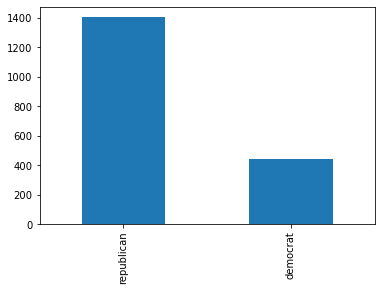

In [24]:
county_winners_overall['party'].value_counts().plot(kind='bar')

The accompanying visualization clearly shows that the republican party received more votes than the democrat party.

It was clear from my visualization that the number of republican voters outnumbered the number of democratic votes. 

My secondary goal is to see if the number of Republican voters grows, will more or fewer people believe that global warming should be a top concern for the next president and Congress, and if they agree or disagree that citizens and local governments should do more to combat it. This will help to understand if republican voters support the idea of combating global warming or no.

In [25]:
def avg_vote_strength(df: pd.DataFrame, col1: str, col2: str):
    df_avg_vote = df.groupby([col1], sort=False)[col2].mean().reset_index()

    return df_avg_vote


countypres_political = avg_vote_strength(countypres_winners, 'county', 'votes_percent')

## FINAL MERGED DATASET

To fetch all the necessary column names, we merge DATASOURCE 1 with DATASOURCE 2

In [26]:
def merge_winner_party(df1: pd.DataFrame, df2: pd.DataFrame, df3: pd.DataFrame, col1: str, col2: str):
    
    x1 = pd.merge(df1, df2, how='left', on=col1)
    x2 = pd.merge(x1, df3, how='left', left_on=col1, right_on=col2)

    return x2.dropna()

county_winner_political_climate_data = merge_winner_party(county_winners_overall, countypres_political, climate_data_county_hyp1, 'county', 'GeoName')

In [27]:
county_winner_political_climate_data.head()

county       party  votes_percent GeoType    GEOID  GeoName  TotalPop  \
0  Autauga  republican       0.728733  County   1001.0  Autauga   41829.0   
1  Baldwin  republican       0.755888  County   1003.0  Baldwin  162434.0   
2  Baldwin  republican       0.755888  County  13009.0  Baldwin   36585.0   
3  Barbour  republican       0.517098  County   1005.0  Barbour   20346.0   
4  Barbour  republican       0.517098  County  54001.0  Barbour   13360.0   

   discuss  discussOppose  reducetax  ...  devharm  devharmOppose  futuregen  \
0   26.008         73.952     55.775  ...   54.355         29.051     57.917   
1   28.183         71.754     55.663  ...   54.925         30.230     59.750   
2   25.934         74.011     67.448  ...   56.423         21.227     63.708   
3   26.345         73.566     65.585  ...   59.994         19.609     62.346   
4   30.523         69.340     58.880  ...   56.391         29.395     63.132   

   futuregenOppose  harmplants  harmplantsOppose  timing  timingOppose  \
0           27.677      58.486            27.972  46.432        53.569   
1           27.537      61.206            26.070  44.702        55.298   
2           18.443      63.330            19.700  54.228        45.775   
3           18.838      64.491            18.005  55.964        44.035   
4           24.481      63.096            26.031  47.888        52.113   

   affectweather  affectweatherOppose  
0         48.884                8.061  
1         50.362                8.506  
2         56.482                5.621  
3         56.914                5.907  
4         54.038                7.653  

[5 rows x 67 columns]

Assigning color to each party. Red for Republic and Blue for Democrat

In [28]:
county_winner_political_climate_data['color'] = county_winner_political_climate_data['party']
county_winner_political_climate_data['color'] = county_winner_political_climate_data['color'].map({'republican': 'red', 'democrat': 'blue'})
county_winner_political_climate_data.head()

county       party  votes_percent GeoType    GEOID  GeoName  TotalPop  \
0  Autauga  republican       0.728733  County   1001.0  Autauga   41829.0   
1  Baldwin  republican       0.755888  County   1003.0  Baldwin  162434.0   
2  Baldwin  republican       0.755888  County  13009.0  Baldwin   36585.0   
3  Barbour  republican       0.517098  County   1005.0  Barbour   20346.0   
4  Barbour  republican       0.517098  County  54001.0  Barbour   13360.0   

   discuss  discussOppose  reducetax  ...  devharmOppose  futuregen  \
0   26.008         73.952     55.775  ...         29.051     57.917   
1   28.183         71.754     55.663  ...         30.230     59.750   
2   25.934         74.011     67.448  ...         21.227     63.708   
3   26.345         73.566     65.585  ...         19.609     62.346   
4   30.523         69.340     58.880  ...         29.395     63.132   

   futuregenOppose  harmplants  harmplantsOppose  timing  timingOppose  \
0           27.677      58.486            27.972  46.432        53.569   
1           27.537      61.206            26.070  44.702        55.298   
2           18.443      63.330            19.700  54.228        45.775   
3           18.838      64.491            18.005  55.964        44.035   
4           24.481      63.096            26.031  47.888        52.113   

   affectweather  affectweatherOppose  color  
0         48.884                8.061    red  
1         50.362                8.506    red  
2         56.482                5.621    red  
3         56.914                5.907    red  
4         54.038                7.653    red  

[5 rows x 68 columns]

### VISUALIZATION 4 - Do Republican voters support or believe that global warming should be a key priority for the next president and Congress, and that citizens and local governments should do more to combat it?

In [29]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

numerical_columns = ['citizens', 'supportRPS', 'gwvoteimp', 'priority','worried',  'harmplants', 'affectweather']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='supportRPS',
 description='Column:',
 disabled=False,
)

def republic_democrat_trend(columns):
    sns.set_style("dark")
    gridobj = sns.lmplot(x="votes_percent", y=columns,
                         data=county_winner_political_climate_data,
                         height=7,
                         robust=True,
                         palette='party',
                         col="party",
                         scatter_kws=dict(s=60, linewidths=1.7, edgecolors='black'),
                         line_kws={'color': 'red'})

    # Decorations
    # gridobj.set(xlim=(0.4, 1), ylim=(40,80))
    plt.show()
    
interactive(republic_democrat_trend, columns = drop_down)

interactive(children=(Dropdown(description='Column:', index=1, options=('citizens', 'supportRPS', 'gwvoteimp',…

Based on the graphs above, we may deduce that as the number of republican voters rises, fewer people believe that global warming should be a key priority for the next president and Congress, and that citizens and local governments should do more to combat it.

### VISUALIZATION 5 - Comparing the percentage of votes cast in Republican and Democratic states viewpoints on several factors related to global warming. This will reveal which political party is most opposed to the fact that global warming is a problem that must be addressed.

The graphs below indicate the number of republican and democratic party supporters, as well as their opinions regarding combating climate change consequences, based on several factors such as global warming conversation, officials opinion, prioritization, weather affect, and education.

In [30]:
republican_discussionoppose = county_winner_political_climate_data[county_winner_political_climate_data['party'] == 'republican']['discussOppose'].sum()
democratic_discussionoppose = county_winner_political_climate_data[county_winner_political_climate_data['party'] == 'democrat']['discussOppose'].sum()

my_data = [republican_discussionoppose,democratic_discussionoppose]
my_labels = ['Republic','Democratic']

numerical_columns = ['discussOppose',
       'reducetaxOppose', 
       'localofficialsOppose', 'governorOppose','humanOppose', 
       'consensusOppose', 'worriedOppose', 'affectweather','futuregen','supportRPS','congress',
       'personalOppose','teachGWOppose','priorityOppose']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='discussOppose',
 description='Column:',
 disabled=False,
)

from bqplot import pyplot as bqplt

def pie_viz(columns):
    
    republican_discussionoppose = county_winner_political_climate_data[county_winner_political_climate_data['party'] == 'republican'][columns].sum()
    democratic_discussionoppose = county_winner_political_climate_data[county_winner_political_climate_data['party'] == 'democrat'][columns].sum()

    my_data = [republican_discussionoppose,democratic_discussionoppose]
    my_labels = ['Republic','Democratic']

    explode = (0, 0.1,)  

    fig1, ax1 = plt.subplots(figsize=(15,8))
    ax1.pie(my_data, explode=explode, labels=my_labels, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 18}, colors=["Red","Blue"])
    ax1.axis('equal')  
    plt.title("Pie chart for "+columns)
    plt.show()
    
def map_viz(columns):
    
    fullData = fullData.astype({"totalvotes": int})
    fullData2 = fullData.groupby('state_po', as_index=False)['totalvotes'].sum()
    df = fullData2

    fig = go.Figure(data=go.Choropleth(
        locations=df['state_po'], # Spatial coordinates
        z = df['totalvotes'], # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'Reds',
        colorbar_title = "Millions USD",
    ))

    fig.update_layout(
        title_text = '2011 US Agriculture Exports by State',
        geo_scope='usa', # limite map scope to USA
    )

    fig.show()
interactive(pie_viz, columns=drop_down)


interactive(children=(Dropdown(description='Column:', options=('discussOppose', 'reducetaxOppose', 'localoffic…

In [31]:
numerical_columns = ['discussOppose',
       'reducetaxOppose', 
       'localofficialsOppose', 'governorOppose','humanOppose', 
       'consensusOppose', 'worriedOppose', 'affectweather','futuregen','supportRPS','congress',
       'personalOppose']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='discussOppose',
 description='Column:',
 disabled=False,
)

def viewpoint_analysis(columns):
    plt.figure(figsize=(15,8))
    #plt.scatter(climate_data_county_10['GeoName'], climate_data_county_10['presidentOppose'], c='r', label='President oppose')
    x_republic = county_winner_political_climate_data[county_winner_political_climate_data['party']=='republican']
    x_democrat = county_winner_political_climate_data[county_winner_political_climate_data['party']=='democrat']
    plt.plot(x_republic['GeoName'], x_republic['consensusOppose'], c='r', label='Republican Consensus oppose',linewidth=4.0)
    plt.plot(x_republic['GeoName'], x_republic['teachGWOppose'], c='g', label='Republican Teaching GW oppose',linewidth=3.0)
    plt.plot(x_republic['GeoName'], x_republic[columns], c='y', label='Republican '+columns,linewidth=2.0)


    plt.xlabel('GeoNames')
    plt.ylabel('% oppose')
    plt.xticks(" ")
    plt.title('Republican: Global Warming VS Viewpoints')
    plt.legend()
    plt.show()

interactive(viewpoint_analysis, columns=drop_down)


interactive(children=(Dropdown(description='Column:', options=('discussOppose', 'reducetaxOppose', 'localoffic…

### VISUALIZATION 6 - Will there be an impact on actions that prioritize, address, and improve accountability for global warming if the number of Republican voters in the state rises?

In [32]:
numerical_columns = ['discussOppose',
       'reducetaxOppose', 
       'localofficialsOppose', 'governorOppose','humanOppose', 
       'consensusOppose', 'worriedOppose', 'affectweather','futuregen','supportRPS','congress',
       'personalOppose']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='discussOppose',
 description='Column:',
 disabled=False,
)

def hist_analysis(columns):
    df_vote_opp_cols = county_winner_political_climate_data[['votes_percent',columns, 'corporationsOppose', 'teachGWOppose']]

    g = sns.pairplot(df_vote_opp_cols, kind="reg", plot_kws={'line_kws':{'color':'red'}})

    g.map_upper(sns.scatterplot,color='yellow')
    g.map_lower(sns.scatterplot, color='pink')
    g.map_diag(plt.hist)
    
interactive(hist_analysis, columns=drop_down)

interactive(children=(Dropdown(description='Column:', options=('discussOppose', 'reducetaxOppose', 'localoffic…

### As seen in the graph above, as the number of Republican voters in a county rises, it's possible that a higher percentage of poll respondents in that county reject measures that prioritize, address, and improve responsibility for global warming

## Datasource 3 - Energy Data

In [33]:
different_energy_data = pd.read_excel('energy_generation_state_data.xls', index_col=None, header=1)
different_energy_data.head()

YEAR STATE               TYPE OF PRODUCER               ENERGY SOURCE  \
0  1990    AK  Total Electric Power Industry                       Total   
1  1990    AK  Total Electric Power Industry                        Coal   
2  1990    AK  Total Electric Power Industry  Hydroelectric Conventional   
3  1990    AK  Total Electric Power Industry                 Natural Gas   
4  1990    AK  Total Electric Power Industry                   Petroleum   

   GENERATION (Megawatthours)  
0                   5599506.0  
1                    510573.0  
2                    974521.0  
3                   3466261.0  
4                    497116.0

In [34]:
different_energy_data.shape

(53756, 5)

### Classifying if the energy source is Renewable or non-Renewable

In [35]:
def classify(df: pd.DataFrame, col1: str, str1: str, str2: str) -> pd.DataFrame:
    
    renewable = ['Hydroelectric Conventional', 'Wind', 'Pumped Storage', 'Geothermal', 'Solar Thermal and Photovoltaic']
    df['ENERGY TYPE'] = [str1 if x in renewable else str2 if x == 'Total' else 'Non-Renewable' for x in df[col1]]

    return df
different_energy_data.drop(different_energy_data[different_energy_data['STATE'] == 'US-TOTAL'].index, inplace = True)
different_energy_data = classify(different_energy_data, 'ENERGY SOURCE', 'Renewable', 'Total')
different_energy_data.head()

YEAR STATE               TYPE OF PRODUCER               ENERGY SOURCE  \
0  1990    AK  Total Electric Power Industry                       Total   
1  1990    AK  Total Electric Power Industry                        Coal   
2  1990    AK  Total Electric Power Industry  Hydroelectric Conventional   
3  1990    AK  Total Electric Power Industry                 Natural Gas   
4  1990    AK  Total Electric Power Industry                   Petroleum   

   GENERATION (Megawatthours)    ENERGY TYPE  
0                   5599506.0          Total  
1                    510573.0  Non-Renewable  
2                    974521.0      Renewable  
3                   3466261.0  Non-Renewable  
4                    497116.0  Non-Renewable

### Here I get State wise total energy generation in Megawatthours

In [36]:
def groupby_sum(df: pd.DataFrame, columns: list, on: str) -> pd.DataFrame:
    return df.groupby(columns)[on].sum().reset_index()

energy_state_consumption = groupby_sum(different_energy_data, ['STATE', 'ENERGY TYPE', 'YEAR'], 'GENERATION (Megawatthours)')
energy_state_consumption = energy_state_consumption.drop(index = 0)
energy_state_consumption.head()

STATE    ENERGY TYPE  YEAR  GENERATION (Megawatthours)
1    AK  Non-Renewable  1990                   9249970.0
2    AK  Non-Renewable  1991                   8987430.0
3    AK  Non-Renewable  1992                   8760608.0
4    AK  Non-Renewable  1993                   8836570.0
5    AK  Non-Renewable  1994                   9242218.0

### Creating seperate columns for Non-Renewable / Renewable and Total enery generation for each state and respective Year

In [37]:
energy_state_grouped = pd.pivot_table(energy_state_consumption, values=['GENERATION (Megawatthours)'], 
                                index=['STATE','YEAR'], columns=['ENERGY TYPE']).reset_index()
energy_state_grouped.head()

STATE  YEAR GENERATION (Megawatthours)                       
ENERGY TYPE                          Non-Renewable  Renewable       Total
0              AK  1990                  9249970.0  1949042.0  11199012.0
1              AK  1991                  8987430.0  1792226.0  10779656.0
2              AK  1992                  8760608.0  1836240.0  10596848.0
3              AK  1993                  8836570.0  2605984.0  11442554.0
4              AK  1994                  9242218.0  2690814.0  11933032.0

### The goal of this analysis is to find consumption of Renewable energy used for this I divide the Renewable enery with Total energy 

In [38]:

energy_state_grouped['PERCENTAGE OF RENEWABLE ENERGY USED'] = (energy_state_grouped[('GENERATION (Megawatthours)', 'Renewable')]/energy_state_grouped[('GENERATION (Megawatthours)', 'Total')])*100
energy_state_grouped.head()

STATE  YEAR GENERATION (Megawatthours)                         \
ENERGY TYPE                          Non-Renewable  Renewable       Total   
0              AK  1990                  9249970.0  1949042.0  11199012.0   
1              AK  1991                  8987430.0  1792226.0  10779656.0   
2              AK  1992                  8760608.0  1836240.0  10596848.0   
3              AK  1993                  8836570.0  2605984.0  11442554.0   
4              AK  1994                  9242218.0  2690814.0  11933032.0   

            PERCENTAGE OF RENEWABLE ENERGY USED  
ENERGY TYPE                                      
0                                     17.403696  
1                                     16.626004  
2                                     17.328172  
3                                     22.774496  
4                                     22.549290

## Calculating the mean percentage of renewable energy used for each state over the years

In [39]:
energy_state_consumption_grouped = energy_state_grouped.groupby(['STATE'])['PERCENTAGE OF RENEWABLE ENERGY USED'].mean().reset_index()
energy_state_consumption_grouped = energy_state_consumption_grouped.sort_values('PERCENTAGE OF RENEWABLE ENERGY USED', ascending = False).head(20).reset_index()
energy_state_consumption_grouped = energy_state_consumption_grouped.drop(['index'], axis = 1)
energy_state_consumption_grouped.rename(columns = {'PERCENTAGE OF RENEWABLE ENERGY USED' : 'MEAN PERCENTAGE OF RENEWABLE ENERGY USED'}, inplace = True)
energy_state_consumption_grouped

STATE  MEAN PERCENTAGE OF RENEWABLE ENERGY USED
0         ID                                 84.385863
1         WA                                 76.672228
2         OR                                 73.334740
3         SD                                 62.707689
4         MT                                 39.775490
5         VT                                 30.047760
6         CA                                 29.332757
7         ME                                 29.223480
8         AK                                 21.733011
9         NY                                 20.233145
10        NV                                 14.631218
11        IA                                 13.536678
12        ND                                 13.332304
13  US-Total                                 13.122647
14        OK                                 10.985885
15        TN                                 10.253370
16        AZ                                  9.488114
17        CO                                  9.146881
18        NH                                  8.789037
19        MN                                  8.566057

In [40]:
fullData2 = fullData.merge(energy_state_consumption_grouped, left_on=['state_po'], right_on=['STATE'])

In [41]:
energy_state_consumption_grouped

STATE  MEAN PERCENTAGE OF RENEWABLE ENERGY USED
0         ID                                 84.385863
1         WA                                 76.672228
2         OR                                 73.334740
3         SD                                 62.707689
4         MT                                 39.775490
5         VT                                 30.047760
6         CA                                 29.332757
7         ME                                 29.223480
8         AK                                 21.733011
9         NY                                 20.233145
10        NV                                 14.631218
11        IA                                 13.536678
12        ND                                 13.332304
13  US-Total                                 13.122647
14        OK                                 10.985885
15        TN                                 10.253370
16        AZ                                  9.488114
17        CO                                  9.146881
18        NH                                  8.789037
19        MN                                  8.566057

### Visualization 7 - Which states are in the top N in terms of renewable energy consumption? In this case, N might be any number that the user wishes to see.

In [42]:
numerical_columns = [x for x in range(4,20)]
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value=9,
 description='No.of states',
 disabled=False,
)

def state_energy_plot(columns):
    plt.figure(figsize=(20,10))
    sns.barplot(y = "MEAN PERCENTAGE OF RENEWABLE ENERGY USED", x = "STATE", 
                     data = energy_state_consumption_grouped[:columns], palette=("magma"))
    plt.xticks(rotation=45)
    
interactive(state_energy_plot, columns=drop_down)

interactive(children=(Dropdown(description='No.of states', index=5, options=(4, 5, 6, 7, 8, 9, 10, 11, 12, 13,…

## With datasource 3 I was able to find State wise data for mean percentage of renewable energy used

## Datasource 4 - state election dataset

In [43]:
state_election_data = pd.read_csv('state_president_election_data.csv')
state_election_data = state_election_data.reset_index(drop=True)
state_election_data.head()

year    state state_po  state_fips  state_cen  state_ic        office  \
0  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
1  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
2  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
3  1976  ALABAMA       AL           1         63        41  US PRESIDENT   
4  1976  ALABAMA       AL           1         63        41  US PRESIDENT   

                 candidate              party_detailed writein  \
0            CARTER, JIMMY                    DEMOCRAT   False   
1             FORD, GERALD                  REPUBLICAN   False   
2           MADDOX, LESTER  AMERICAN INDEPENDENT PARTY   False   
3  BUBAR, BENJAMIN ""BEN""                 PROHIBITION   False   
4                HALL, GUS         COMMUNIST PARTY USE   False   

   candidatevotes  totalvotes   version  notes party_simplified  
0          659170     1182850  20210113    NaN         DEMOCRAT  
1          504070     1182850  20210113    NaN       REPUBLICAN  
2            9198     1182850  20210113    NaN            OTHER  
3            6669     1182850  20210113    NaN            OTHER  
4            1954     1182850  20210113    NaN            OTHER

In [44]:
state_election_data.shape

(4287, 15)

In [45]:
winner_data = state_election_data.groupby(['year', 'state','state_po'])['candidatevotes'].max().reset_index()
winner_data.head()

year       state state_po  candidatevotes
0  1976     ALABAMA       AL          659170
1  1976      ALASKA       AK           71555
2  1976     ARIZONA       AZ          418642
3  1976    ARKANSAS       AR          498604
4  1976  CALIFORNIA       CA         3882244

In [46]:
winner_data_grouped = pd.merge(state_election_data, winner_data, how='inner')
winner_data_grouped = winner_data_grouped[['year', 'state', 'state_po', 'party_simplified']]
state_winner_majority = winner_data_grouped.groupby(['state', 'state_po'], sort = False)['party_simplified'].agg(lambda x: stats.mode(x)[0]).reset_index()
state_winner_majority.head()

state state_po party_simplified
0     ALABAMA       AL       REPUBLICAN
1      ALASKA       AK       REPUBLICAN
2     ARIZONA       AZ       REPUBLICAN
3    ARKANSAS       AR       REPUBLICAN
4  CALIFORNIA       CA         DEMOCRAT

### The party that has won a state more number of times than the other is assumed to be leaning towards that party.

In [47]:
state_party_energy = pd.merge(energy_state_consumption_grouped, state_winner_majority, how = 'inner', left_on=['STATE'], right_on = ['state_po'])
state_party_energy

STATE  MEAN PERCENTAGE OF RENEWABLE ENERGY USED          state state_po  \
0     ID                                 84.385863          IDAHO       ID   
1     WA                                 76.672228     WASHINGTON       WA   
2     OR                                 73.334740         OREGON       OR   
3     SD                                 62.707689   SOUTH DAKOTA       SD   
4     MT                                 39.775490        MONTANA       MT   
5     VT                                 30.047760        VERMONT       VT   
6     CA                                 29.332757     CALIFORNIA       CA   
7     ME                                 29.223480          MAINE       ME   
8     AK                                 21.733011         ALASKA       AK   
9     NY                                 20.233145       NEW YORK       NY   
10    NV                                 14.631218         NEVADA       NV   
11    IA                                 13.536678           IOWA       IA   
12    ND                                 13.332304   NORTH DAKOTA       ND   
13    OK                                 10.985885       OKLAHOMA       OK   
14    TN                                 10.253370      TENNESSEE       TN   
15    AZ                                  9.488114        ARIZONA       AZ   
16    CO                                  9.146881       COLORADO       CO   
17    NH                                  8.789037  NEW HAMPSHIRE       NH   
18    MN                                  8.566057      MINNESOTA       MN   

   party_simplified  
0        REPUBLICAN  
1          DEMOCRAT  
2          DEMOCRAT  
3        REPUBLICAN  
4        REPUBLICAN  
5          DEMOCRAT  
6          DEMOCRAT  
7          DEMOCRAT  
8        REPUBLICAN  
9          DEMOCRAT  
10         DEMOCRAT  
11         DEMOCRAT  
12       REPUBLICAN  
13       REPUBLICAN  
14       REPUBLICAN  
15       REPUBLICAN  
16       REPUBLICAN  
17         DEMOCRAT  
18         DEMOCRAT

### List of Republican states with high mean percentage of renewable energy used.

In [48]:
republican_states = state_party_energy[state_party_energy['party_simplified']=='REPUBLICAN']
republican_states

STATE  MEAN PERCENTAGE OF RENEWABLE ENERGY USED         state state_po  \
0     ID                                 84.385863         IDAHO       ID   
3     SD                                 62.707689  SOUTH DAKOTA       SD   
4     MT                                 39.775490       MONTANA       MT   
8     AK                                 21.733011        ALASKA       AK   
12    ND                                 13.332304  NORTH DAKOTA       ND   
13    OK                                 10.985885      OKLAHOMA       OK   
14    TN                                 10.253370     TENNESSEE       TN   
15    AZ                                  9.488114       ARIZONA       AZ   
16    CO                                  9.146881      COLORADO       CO   

   party_simplified  
0        REPUBLICAN  
3        REPUBLICAN  
4        REPUBLICAN  
8        REPUBLICAN  
12       REPUBLICAN  
13       REPUBLICAN  
14       REPUBLICAN  
15       REPUBLICAN  
16       REPUBLICAN

### VISUALIZATION 8 - Which Republican and Democratic states consume the most renewable energy?

In [49]:
numerical_columns = ['DEMOCRAT','REPUBLICAN']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='DEMOCRAT',
 description='Column:',
 disabled=False,
)

def energy_bar_plot(columns):
    if columns == 'DEMOCRAT':
        plt.figure(figsize=(20,8))
        ax = sns.barplot(y = "MEAN PERCENTAGE OF RENEWABLE ENERGY USED", x = "state", 
                         data = state_party_energy[state_party_energy['party_simplified']==columns], palette=("mako"))
        ax.set(xlabel='State', ylabel='Mean % Renewable Energy used', title = 'Democrat states')
    else:
        plt.figure(figsize=(20,8))
        ax = sns.barplot(y = "MEAN PERCENTAGE OF RENEWABLE ENERGY USED", x = "state", 
                         data = state_party_energy[state_party_energy['party_simplified']==columns], palette=("Reds"))
        ax.set(xlabel='State', ylabel='Mean % Renewable Energy used', title = 'Republican states')
    plt.xticks(rotation=45)
    

In [50]:
import plotly.graph_objects as go

numerical_columns = ['DEMOCRAT','REPUBLICAN']
drop_down=widgets.Dropdown(
 options=numerical_columns,
 value='DEMOCRAT',
 description='Column:',
 disabled=False,
)

def map_demo_rep(columns):
    
    df = state_party_energy[state_party_energy['party_simplified']==columns]
   
    fig = go.Figure(data=go.Choropleth(
        locations=df['STATE'], # Spatial coordinates
        z = df['MEAN PERCENTAGE OF RENEWABLE ENERGY USED'], # Data to be color-coded
        locationmode = 'USA-states', # set of locations match entries in `locations`
        colorscale = 'viridis',
        colorbar_title = "{} State Wise Energy Used".format(columns),
    ))

    fig.update_layout(autosize=False,
    width=1000,
    height=500,
        title_text = "{} State Wise Energy Used".format(columns),
        geo_scope='usa', # limite map scope to USA
    )
    
    fig.show()
    

In [51]:
myDashboard = widgets.VBox([interactive(energy_bar_plot, columns=drop_down), 
                           interactive(map_demo_rep, columns = drop_down)])
myDashboard


My next goal for this project based on Datasource 3 and 4: 

From Datasource 3 - I have state wise Energy generation data and from datasource 4 - I have Presedential election data from 1976 - 2020 . 
On combining these two data source I want to test the following:
    
We deduced from Dataset 1 & 2 that Republicans are opposed to mitigating global warming. Now from dataset 3 & 4 I want to test Have republican-leaning states reduced their use of renewable resources as a percentage of total electricity consumption as a result of this? (Because renewable energy can help battle global warming.)
    

### Visualization 9 - The states that are leading in Republican and Democratic party votes are shown on the map. The graphic allows the user to choose a state and see the trend line between different parties' votes.

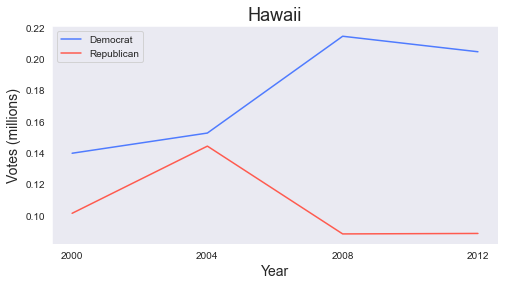

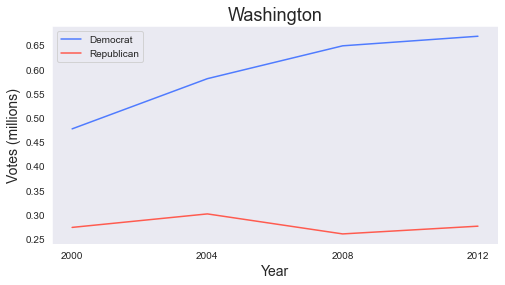

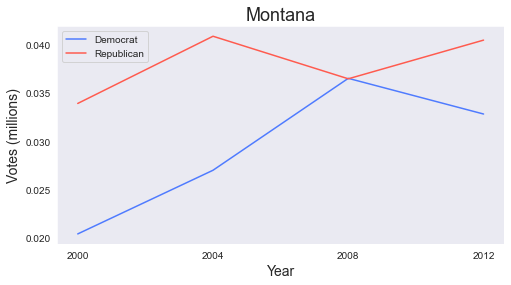

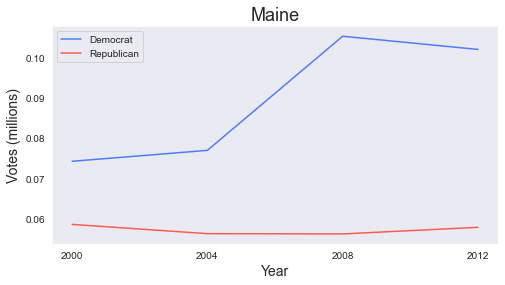

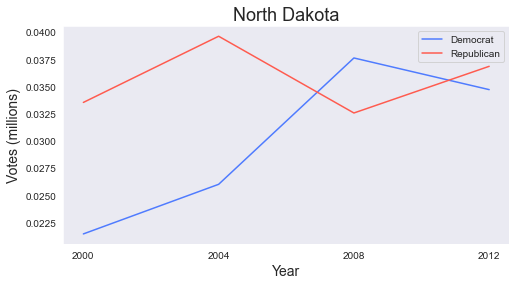

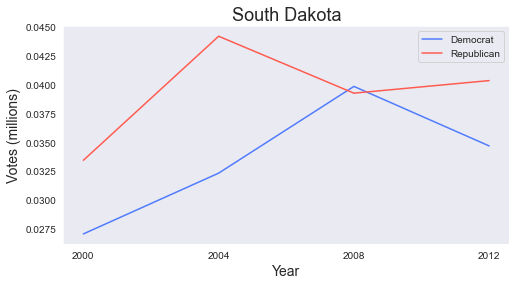

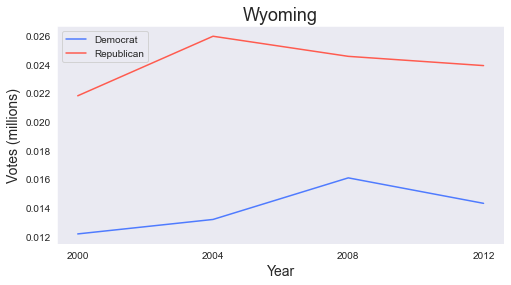

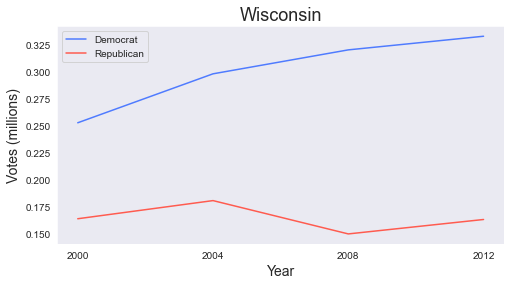

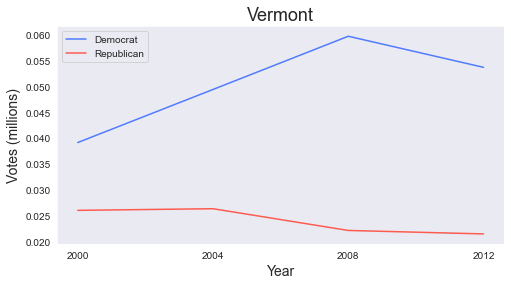

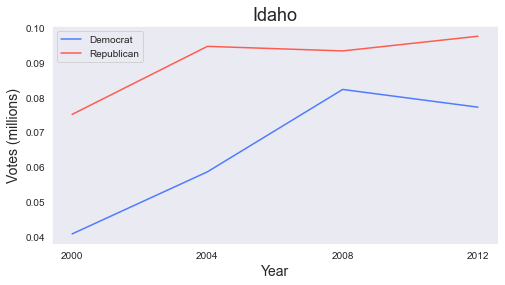

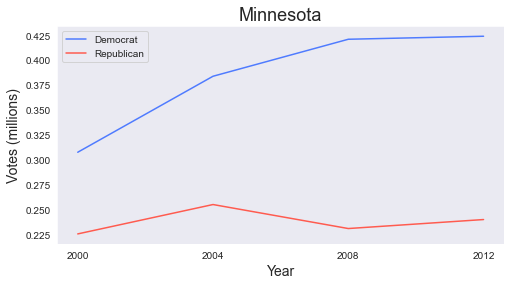

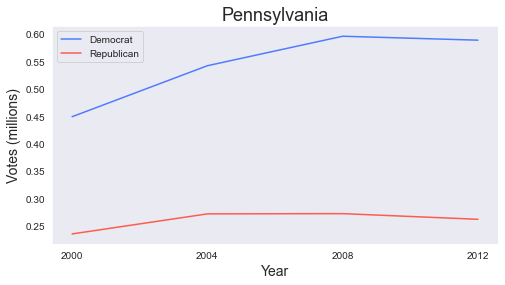

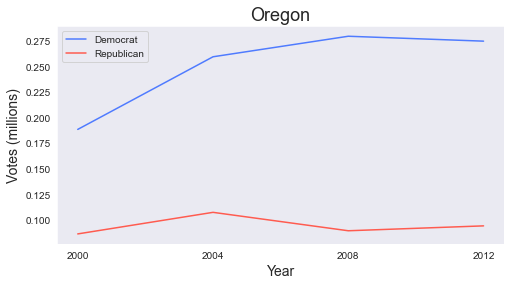

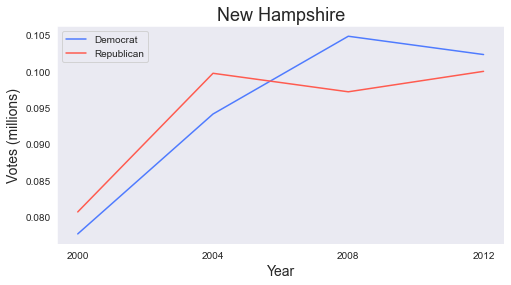

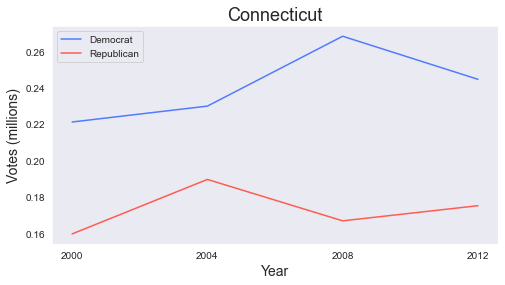

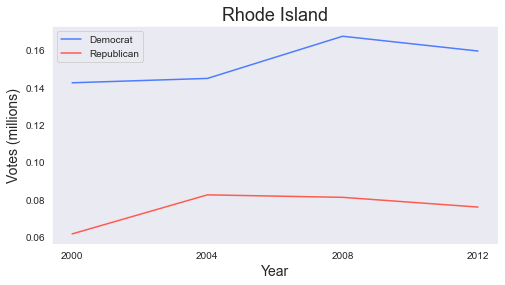

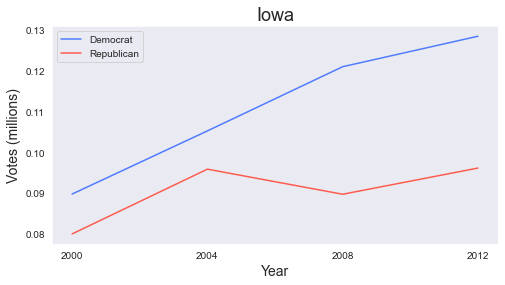

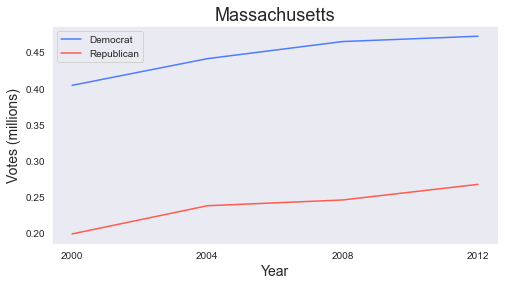

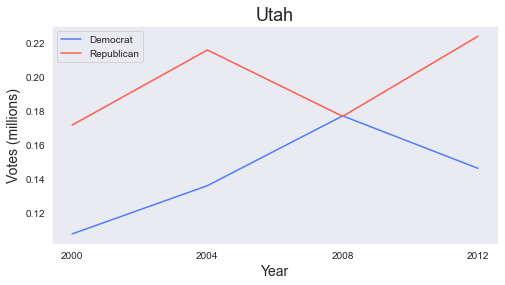

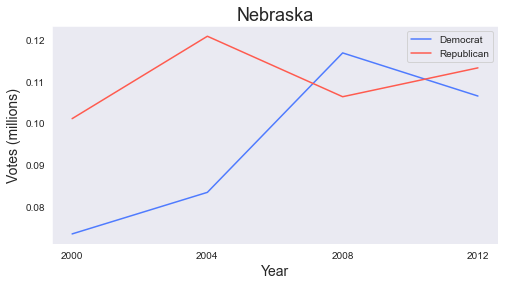

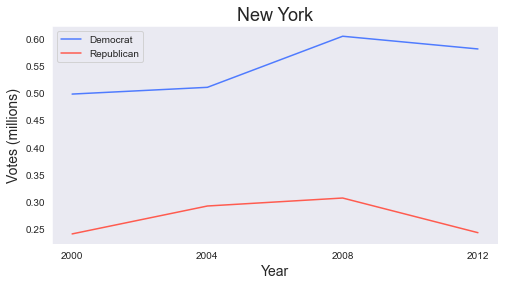

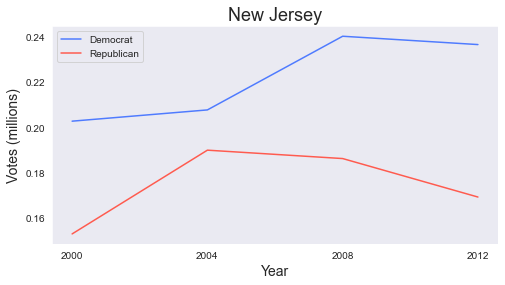

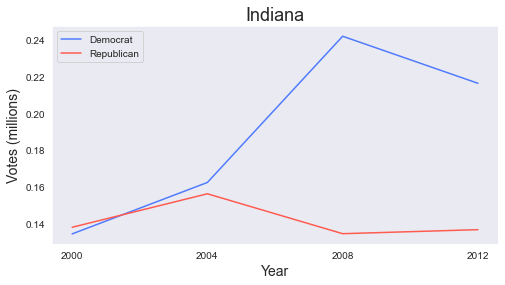

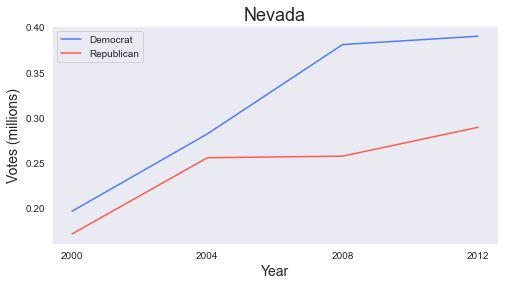

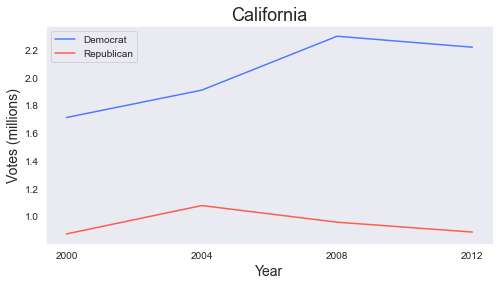

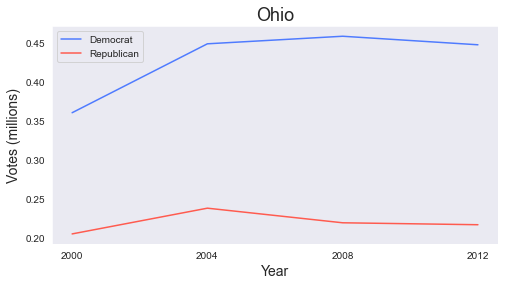

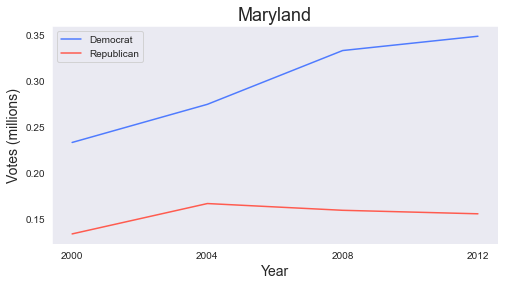

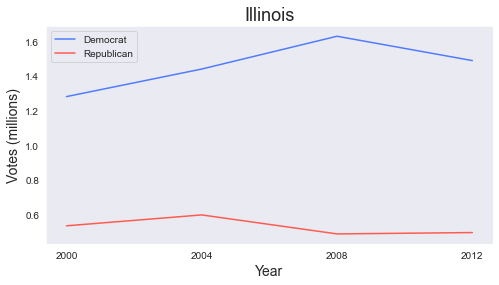

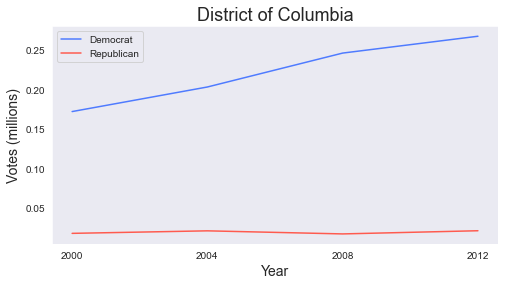

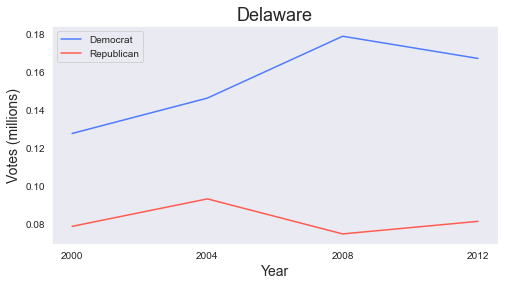

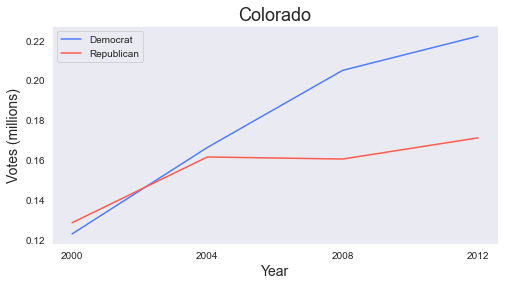

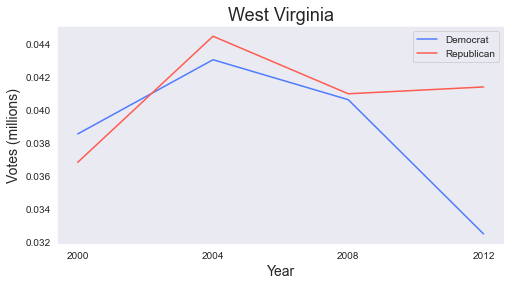

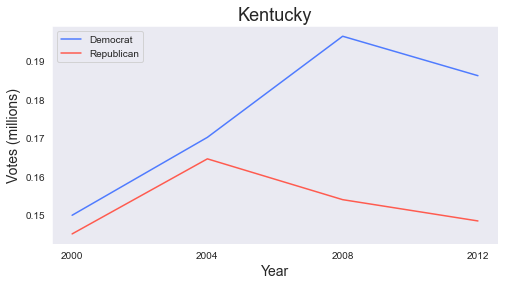

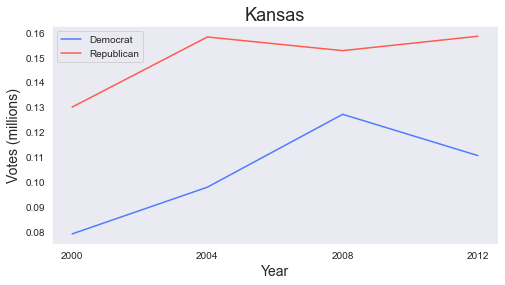

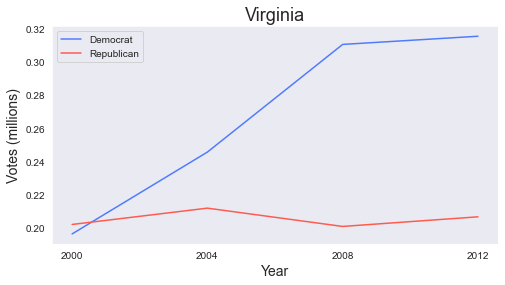

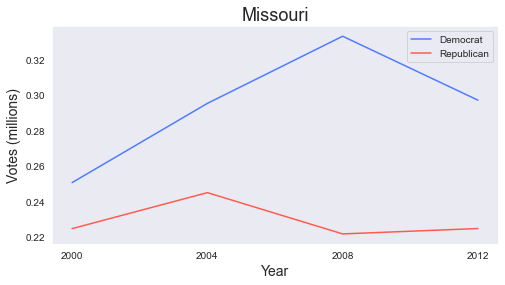

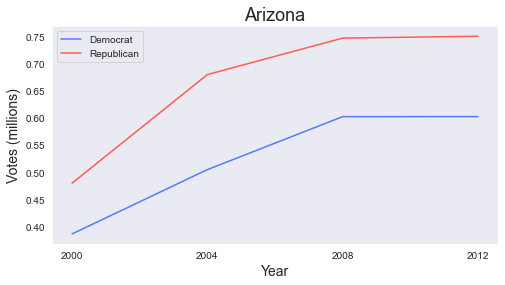

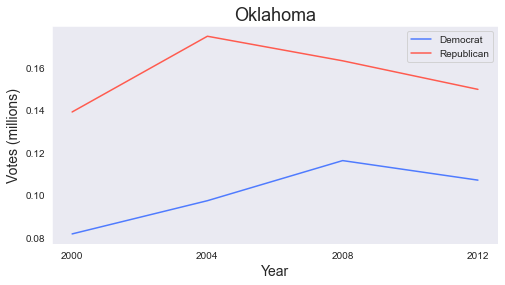

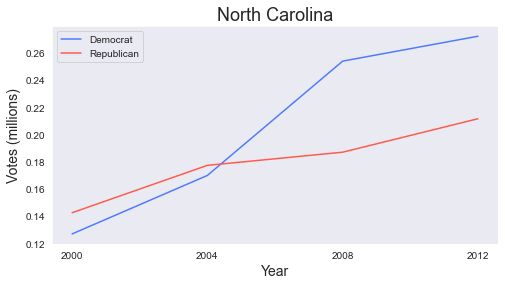

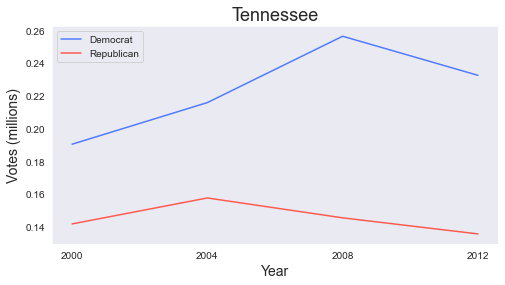

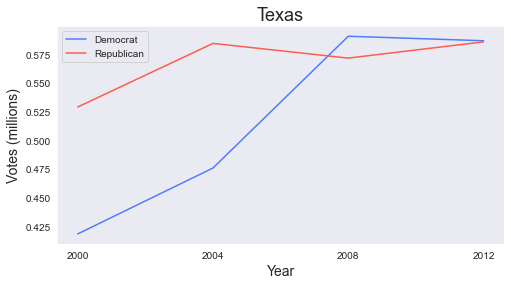

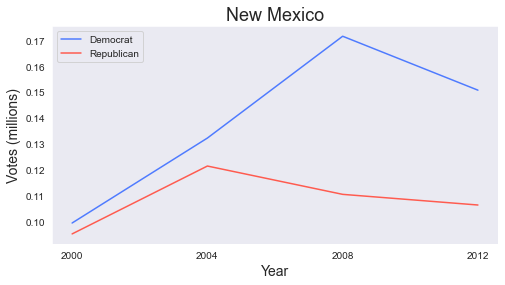

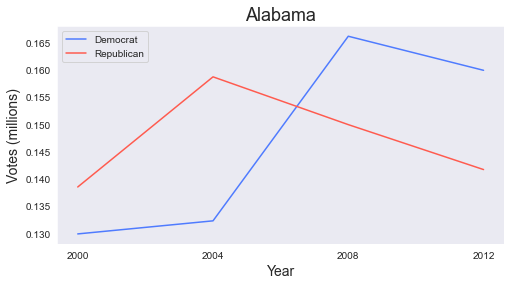

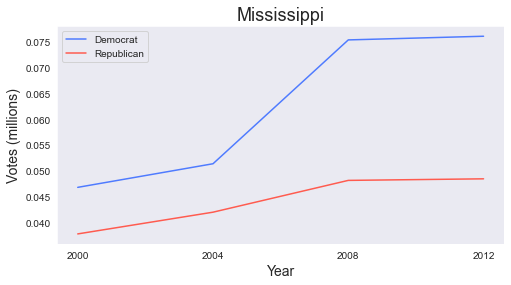

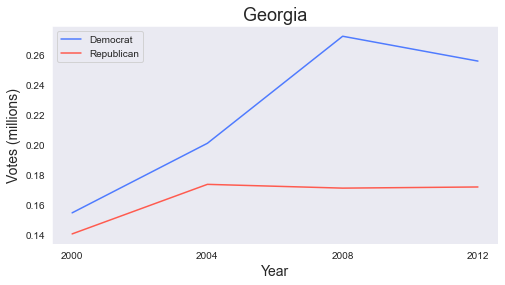

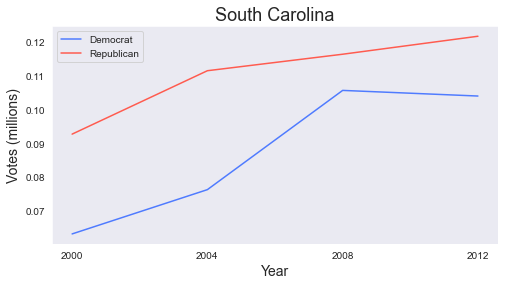

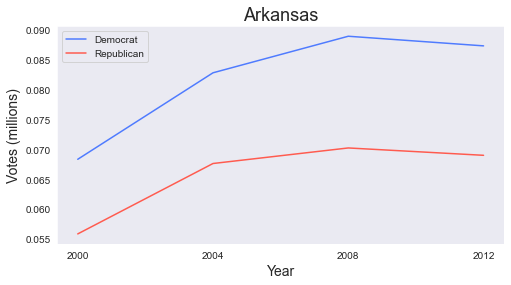

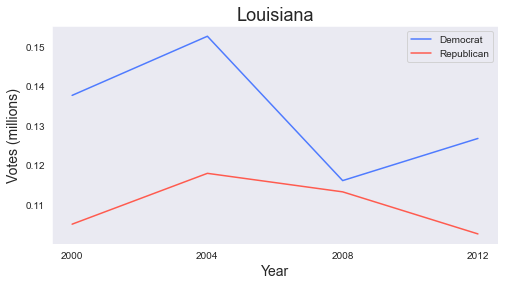

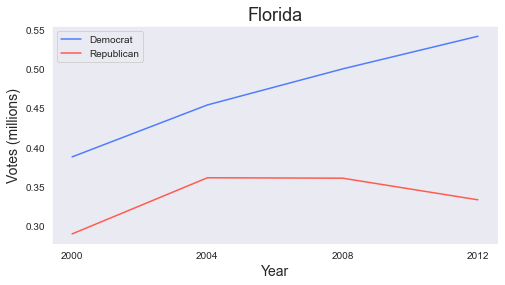

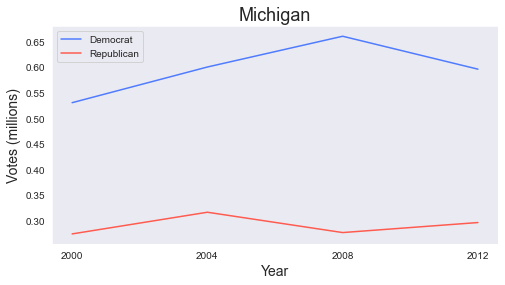

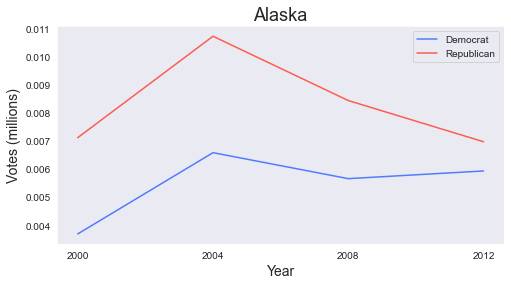

In [52]:
us_map_shape = gpd.read_file('geo_export_5f970296-87fc-497c-b85e-140d4ffda7fb.shp')
us_map_shape = us_map_shape[['state_abbr','state_name','geometry']]

m = folium.Map(location=[50.77500, -100],zoom_start=3) 
choropleth_json =folium.GeoJson(data= us_map_shape.to_json())
m.add_child(choropleth_json)

climate_data_3 = climate_data_1
climate_data_3 = climate_data_3[1:]

states = set(county_pres_data['state'])

results = {}
for year in range(2000,2020,4):
    
    result = {}
    for state in states:
        
        state_year = county_pres_data[(county_pres_data.year == year) 
                              & (county_pres_data.state == state)]
        dem = max(state_year[state_year.party == 'democrat']['candidatevotes'])
        rep = max(state_year[state_year.party == 'republican']['candidatevotes'])
        
        result[state] = {'dem':dem, 'rep':rep}
        
    results[year] = result
    
def style_fill(feature): 
    
    return {'fillOpacity': 0.2,
         'weight': 1,
         'fillColor': '#000000',
         'color': '#000000'}  

def figure_format(state):
    
    years = range(2000,2016,4)
    democrats = []
    republics =[]
    for year in years:

        result = results[year][state]
        democrats.append(result['dem']/1000000)  
        republics.append(result['rep']/1000000) 

    #Plot number of votes    
    fig = plt.figure(figsize=(8,4))
    plt.plot(years,democrats,label='Democrat',color='#4f7bff')
    plt.plot(years,republics,label='Republican',color='#ff5b4f')

    plt.title(state,size = 18)
    plt.ticklabel_format(style='plain')
    plt.xlabel('Year',size =14)
    plt.xticks(years)
    plt.ylabel('Votes (millions)',size =14)
    plt.legend(loc =0)

    
    html = mpld3.fig_to_html(fig)
    iframe = folium.IFrame(html=html,width = 600, height = 300)

    return iframe

def state_map(state,year,function=False):
       
    results_of_state = results[year][state]
    
    if results_of_state['dem'] >= results_of_state['rep']:
        color = 'blue' 
    else:
        color = 'red' 
    
    
    if function == False:
        
        state_map = {
            'opacity': 1,
            'color': color,
        } 
    else:
        
        state_map = {
             'fillOpacity': 1,
             'weight': 1,
             'fillColor': color,
             'color': '#000000'}    
  
    return state_map

def shape_output(feature):
    
    state = feature['properties']['state_name']
    style = state_map(state,year=2016,function=True)
    
    return style

m = folium.Map(location=[50.77500, -100],zoom_start=5,max_zoom=5) #Initialize map
choropleth_json =folium.GeoJson(data= us_map_shape.to_json(),
                           style_function=shape_output)
m.add_child(choropleth_json)

for i in range(len(us_map_shape)):
    
    geometry = us_map_shape.loc[i]['geometry']
    state_name = us_map_shape.loc[i]['state_name']
    popup = folium.Popup(figure_format(state_name),max_width=1000)
    
    state_marker = folium.GeoJson(data=mapping(geometry),
                                  highlight_function = style_fill)
    state_marker.add_child(popup)
    m.add_child(state_marker)

m

### Visualization 10 - This map plot allows the user to select a specific state and examine the trend line indicating renewable energy use in that state over a 20-year period. This will aid in determining whether or not a certain republican or democratic state supports the idea of using renewable energy to combat global warming.

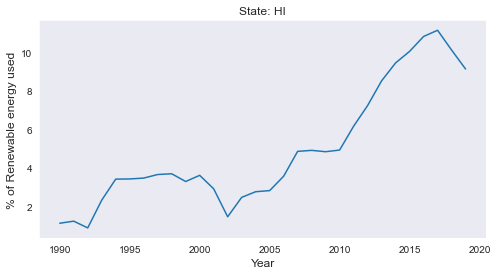

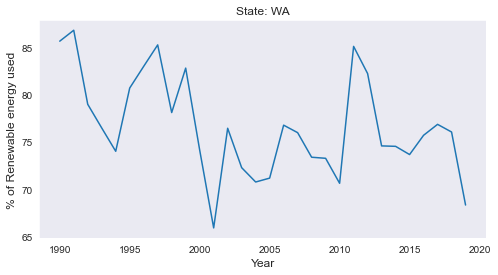

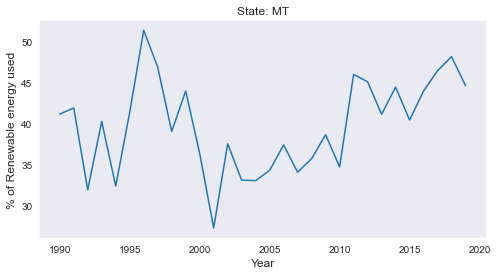

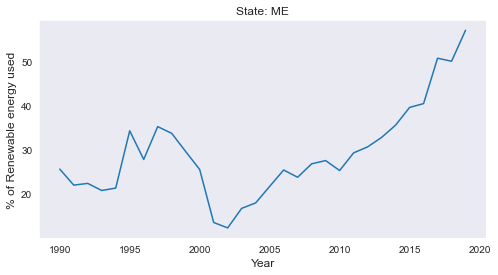

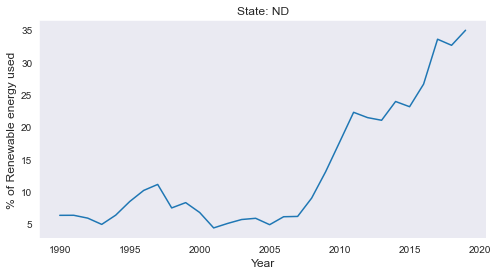

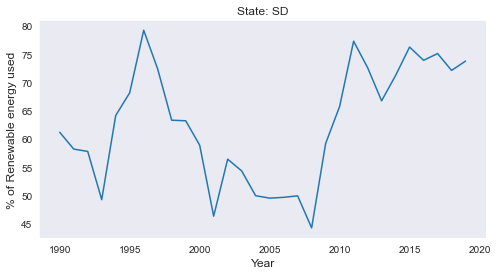

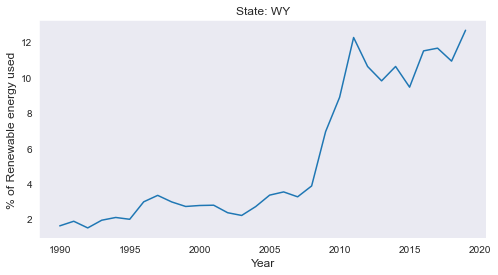

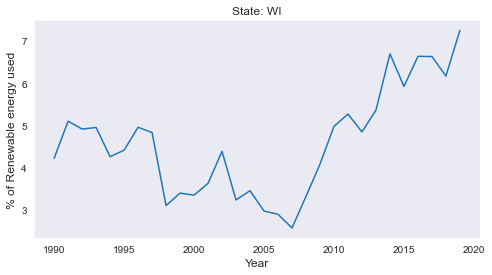

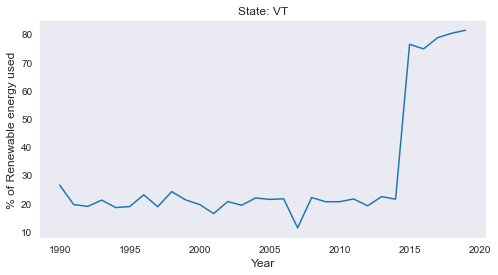

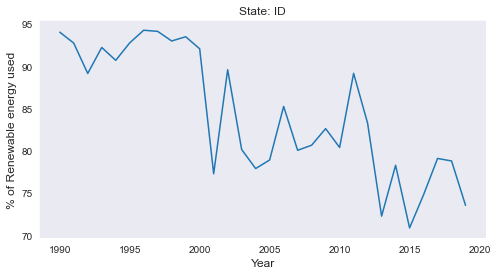

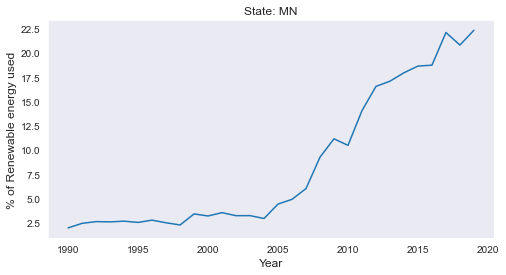

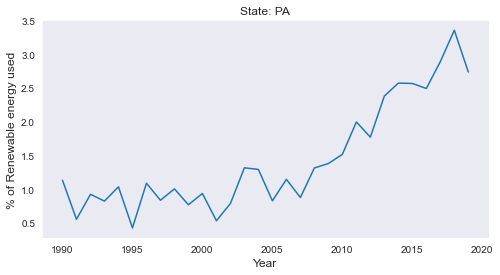

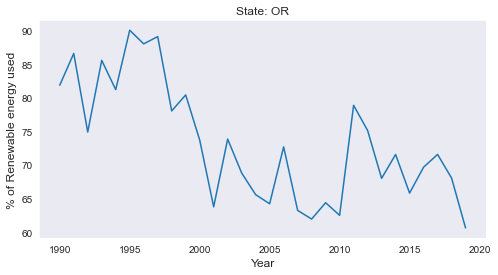

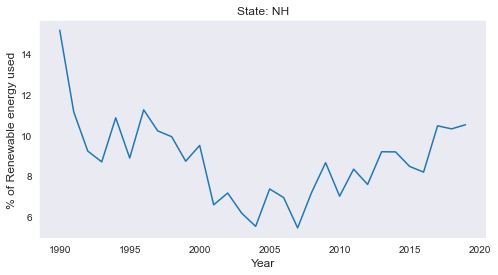

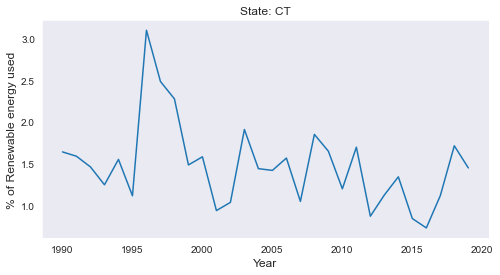

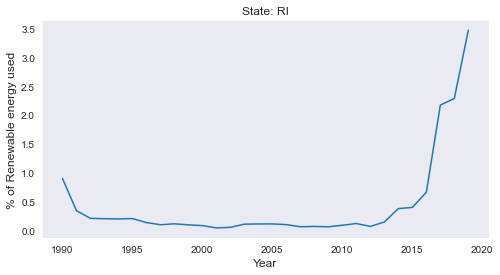

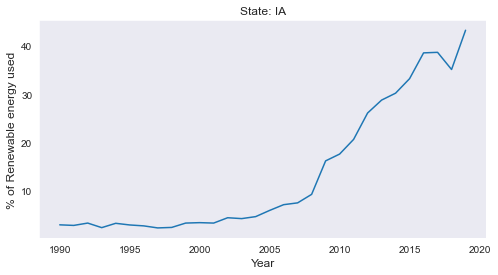

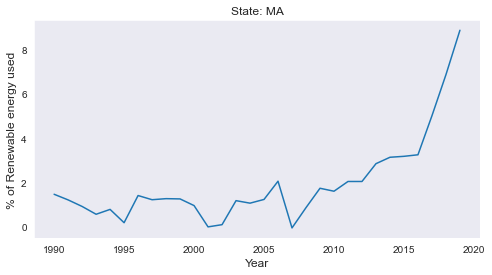

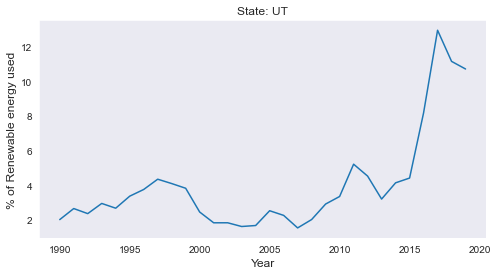

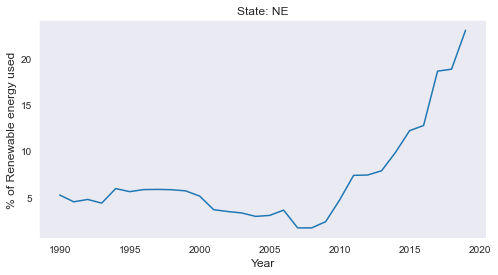

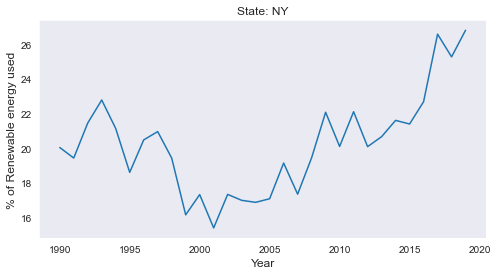

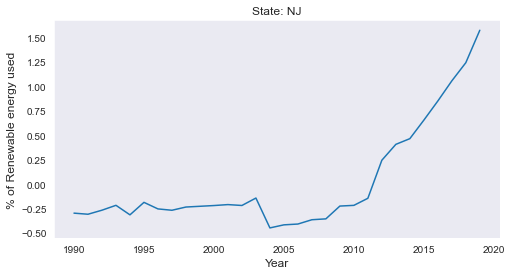

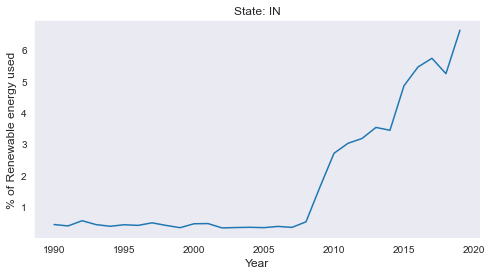

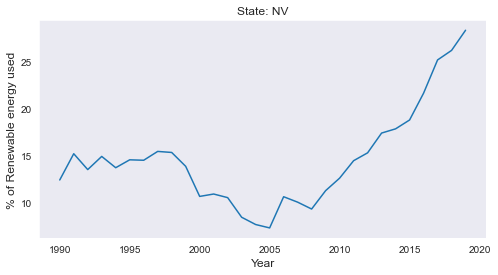

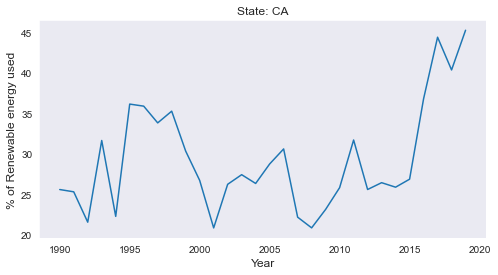

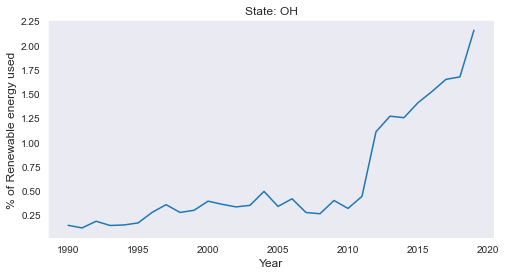

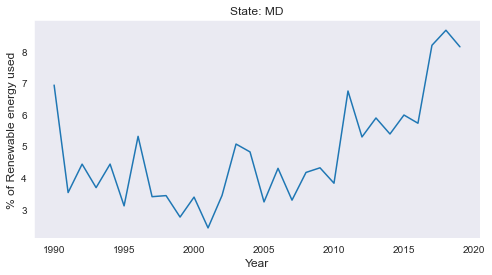

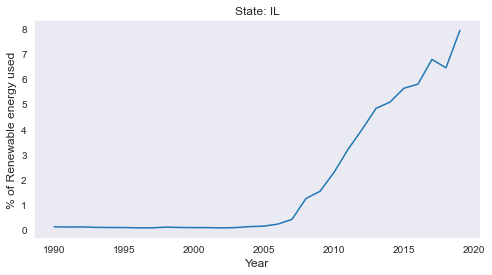

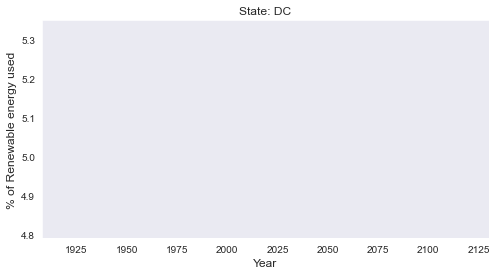

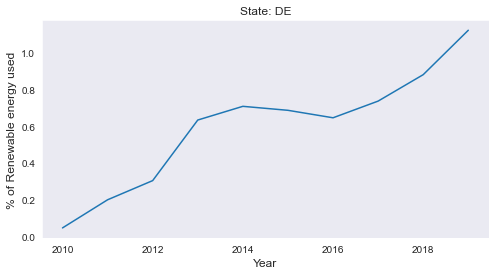

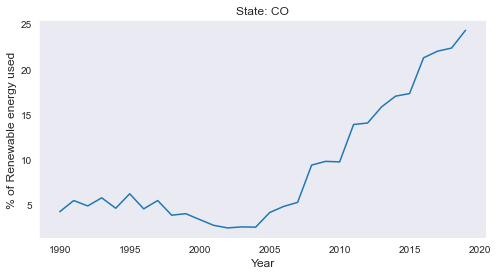

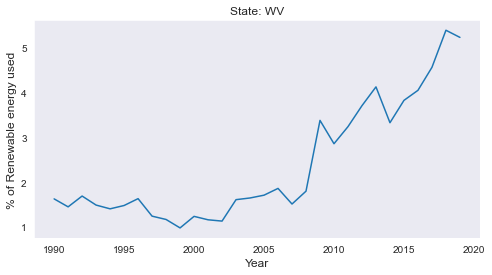

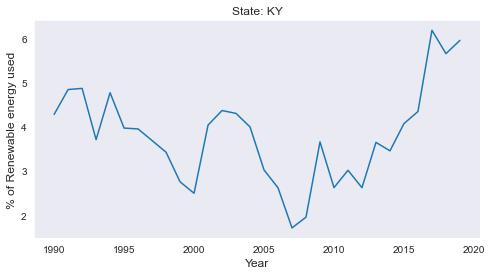

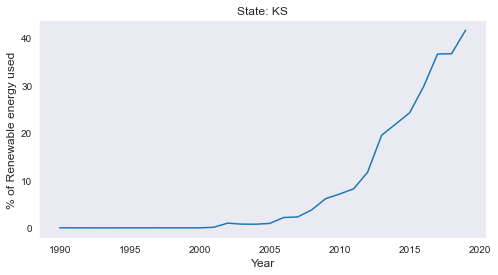

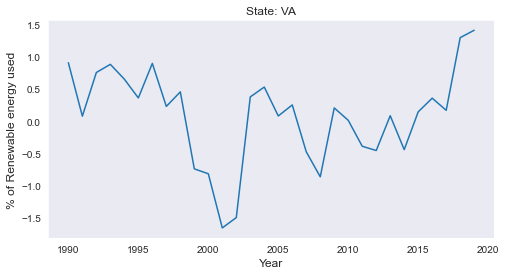

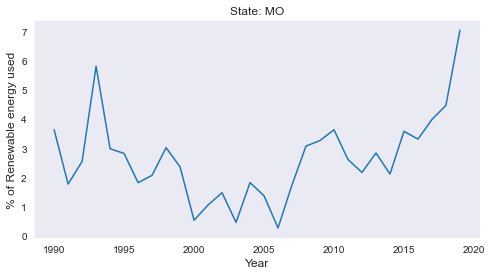

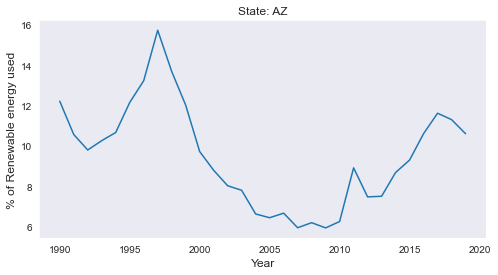

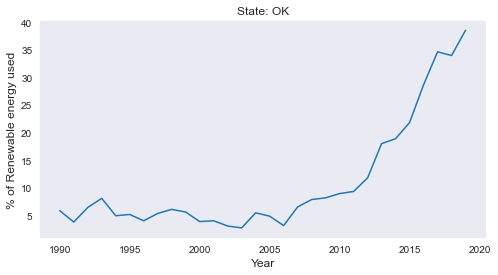

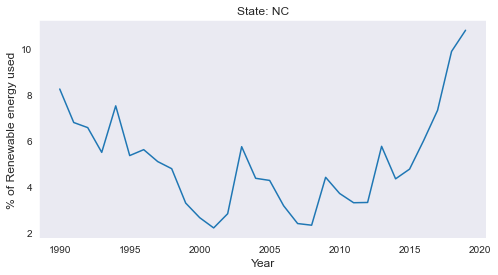

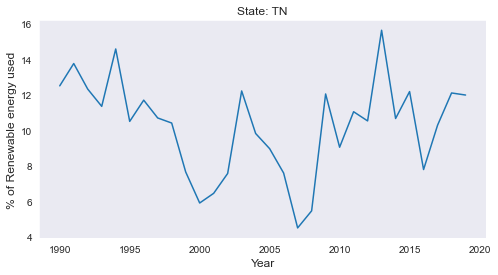

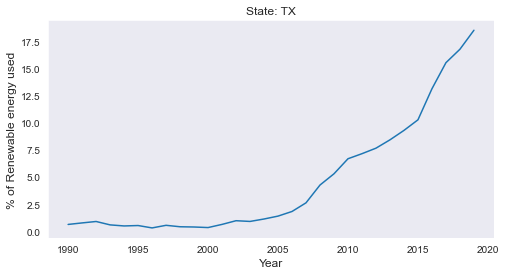

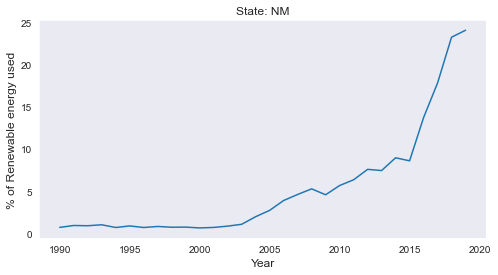

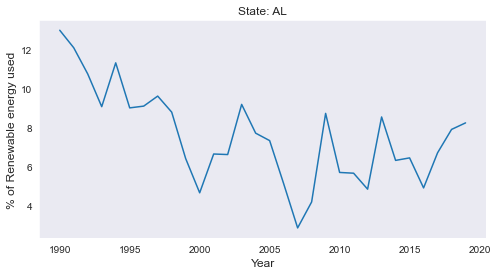

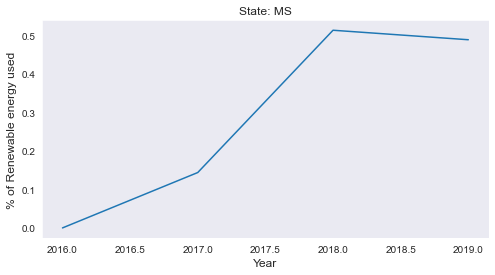

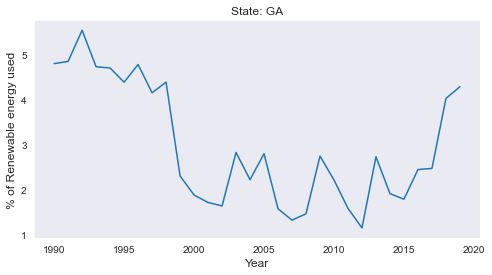

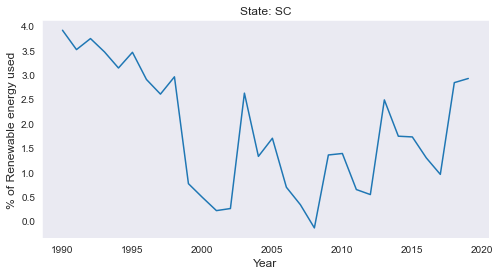

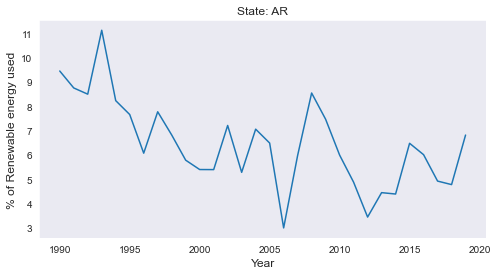

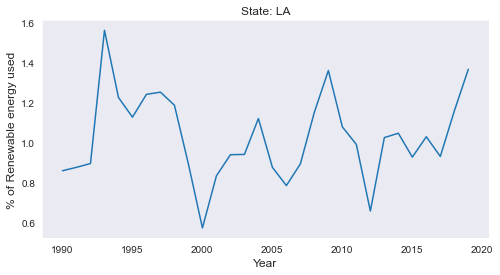

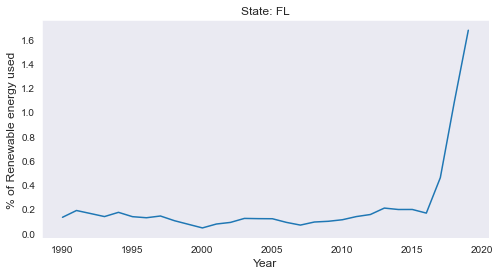

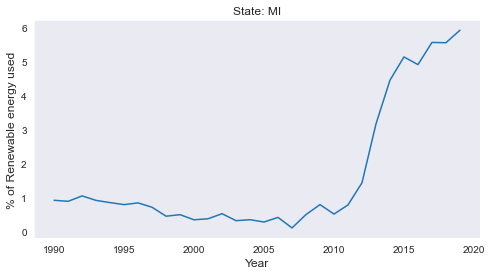

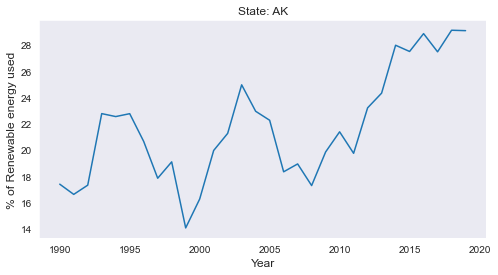

In [53]:
results = {}
states = set(county_pres_data['state'])
for year in range(2000,2020,4):
    
    result = {}
    for state in states:
        
        state_year = county_pres_data[(county_pres_data.year == year) 
                              & (county_pres_data.state == state)]
        dem = max(state_year[state_year.party == 'democrat']['candidatevotes'])
        rep = max(state_year[state_year.party == 'republican']['candidatevotes'])
        
        result[state] = {'dem':dem, 'rep':rep}
        
    results[year] = result

def style_fill(feature): 
    
    return {'fillOpacity': 0.2,
         'weight': 1,
         'fillColor': '#000000',
         'color': '#000000'}  

def viz_plot(state):
      
    years = range(2000,2016,4)
    fig = plt.figure(figsize=(8,4))
    df = energy_state_grouped[energy_state_grouped['STATE']==state]
    df = df.set_index("YEAR")
    #df.plot(x='YEAR', y='PERCENTAGE OF RENEWABLE ENERGY USED', color = 'red')
    plt.plot(df['PERCENTAGE OF RENEWABLE ENERGY USED'])
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('% of Renewable energy used', fontsize=12)
    plt.title("State: "+state)

    #Add figure to iframe
    html = mpld3.fig_to_html(fig)
    iframe = folium.IFrame(html=html,width = 600, height = 300)

    return iframe

def state_map(state,year,function=False):
    """
    Returns the style for a state in a given year
    """    
    results_of_state = results[year][state]
    
    if results_of_state['dem'] >= results_of_state['rep']:
        color = 'blue' 
    else:
        color = 'red' 
    
    #Set state style
    if function == False:
        
        state_map = {
            'opacity': 1,
            'color': color,
        } 
    else:
        
        state_map = {
             'fillOpacity': 1,
             'weight': 1,
             'fillColor': color,
             'color': '#000000'}    
  
    return state_map

def output_style(feature):
    """
    output_style used by the GeoJson folium function
    """

    state = feature['properties']['state_name']
    style = state_map(state,year=2016,function=True)
    
    return style

m = folium.Map(location=[50.77500, -100],zoom_start=5,max_zoom=5) #Initialize map
choropleth_json =folium.GeoJson(data= us_map_shape.to_json(),
                           style_function=output_style)
m.add_child(choropleth_json)

#Create popup button for each state
for i in range(len(us_map_shape)):
    
    geometry = us_map_shape.loc[i]['geometry']
    state_name = us_map_shape.loc[i]['state_name']
    state_abbr = us_map_shape.loc[i]['state_abbr']
    popup = folium.Popup(viz_plot(state_abbr),max_width=1000)
    
    state_marker = folium.GeoJson(data=mapping(geometry),
                                  highlight_function = style_fill)
    state_marker.add_child(popup)
    m.add_child(state_marker)

m

## HOW TO USE THE ABOVE PLOT:

1. The user can just move their cursor over the state they want to see. On the map, republican states are shown in red, whereas democratic states are highlighted in blue.
2. A trend line plot will appear when user select a certain state. This graph can be used to examine how a given democratic or republican state has performed in terms of percentage of Renewable energy consumption.
3. From this, we may determine if a given state believes it is necessary to employ renewable energy to prevent global warming or not.

### The graph shows that both democratic and republican-leaning states did equally well in adopting renewable energy to meet their entire consumption demands. Four out of ten Republican states reduced their renewable energy contribution, compared to three out of ten Democratic-leaning states.
### After 2010, we see a significant increase in the use of renewable energy in most states. This can be ascribed to the Obama administration's Clean Energy and Recovery Act of 2009, which has been termed the largest energy bill in history.

## CONCLUSION: 

1. Data source 1 was climate data, which included state and county-level records as well as various factors such as the percentage of locals who support or oppose the idea of combating global warming, and data source 2 was a presedential election dataset that contained information on how many votes a particular political party (democrat or republican) received, and from this I was able to deduce that the Republican party tends to oppose the idea that global warming is a problem. Finally, the study indicates that when the number of Republican voters in a county increases, it's probable that a bigger percentage of poll respondents in that county will reject initiatives that prioritize, address, and improve global warming responsibility.
2. I was able to obtain State-by-State data for the mean proportion of renewable energy used in dataset 3 (Net Generation of Electricity by State and Type of Energy Produced by Energy Source data from 1990 to 2020). From 1976 until 2020, dataset 4 (the Harvard dataverse dataset) contained data on the number of votes each presidential candidate received in each state. I wanted to see, since Republican States oppose the idea of mitigating global warming, did these states reduced their use of renewable resources as a percentage of overall electricity consumption. According to the findings of the preceding analysis, both Democrat and Republican states did equally well in adopting renewable energy to meet their complete consumption demands.

### SOURCE:

1. https://coderzcolumn.com/tutorials/data-science/interactive-plotting-in-python-jupyter-notebook-using-bqplot
2. https://geopandas.org/en/stable/docs/user_guide/mapping.html
3. https://stackoverflow.com/questions/69235532/add-dropdown-button-to-plotly-express-choropleth-map
4. https://swdevnotes.com/python/2021/interactive-charts-with-ipywidgets-matplotlib/
5. https://www.geeksforgeeks.org/grouped-barplots-in-python-with-seaborn/
6. https://seaborn.pydata.org/examples/index.html
7. https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
8. https://seaborn.pydata.org/generated/seaborn.lineplot.html
9. https://plotly.com/python/bar-charts/
10. https://bqplot.readthedocs.io/en/latest/_generate/bqplot.marks.Bars.html
11. https://python-visualization.github.io/folium/quickstart.html
